In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [2]:
Data=pd.read_csv("Data file.csv") # Loadng the data

In [3]:
Data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
Data.drop("Unnamed: 0",axis=1,inplace=True) #Dropping the first column

In [5]:
Data.shape #checking the rows and columns

(209593, 36)

In [6]:
Data.columns #checking the total number of columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [7]:
Data.info() #checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [8]:
# It can be observed that majority are numeric value apart from 3 columns

In [9]:
Data.isnull().sum() #Checking for null values

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [10]:
# No null values

### Analysing various features along with its effects on loan credibility

In [11]:
Data['aon'].value_counts() # Checking the various age on cellular network 

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4507, dtype: int64

In [12]:
Data['aon'].max()

999860.755167902

In [13]:
Data['aon'].min()

-48.0

In [14]:
# It seems that age on cellular network has huge outliers present as data in maximum and minimum age is unrealistic

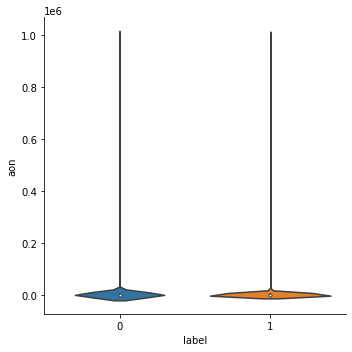

In [15]:
sns.catplot(data=Data, x='label', y='aon',kind='violin')

In [16]:
Data['daily_decr30'].max()

265926.0

In [17]:
Data['daily_decr30'].min()

-93.0126666666667

<AxesSubplot:xlabel='daily_decr30'>

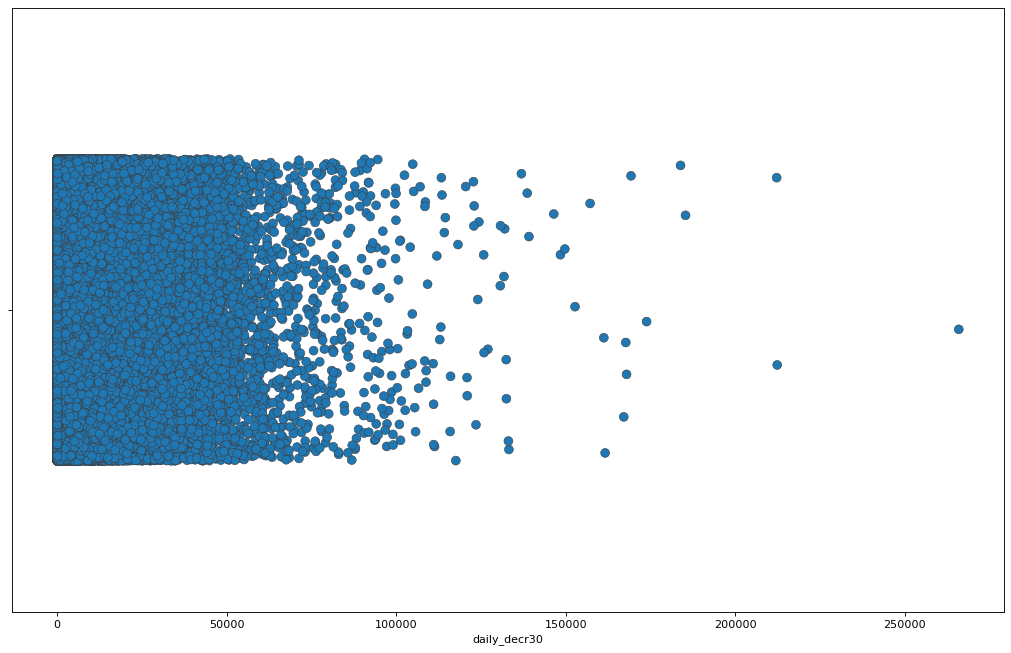

In [18]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(Data.daily_decr30, jitter=0.25, size=8, ax=ax, linewidth=.5)

In [19]:
# Again data shows the presence of huge outliers as the highest amount spent in 30 days is 265926.0 and lowest amount is -93

In [20]:
Data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [21]:
# Data has huge outliers present in all the columns apart from labels
# There is a huge difference between mean and standard deviation
# Lot of columns have negative value which shows incorrect data and thus needs to treated differently

<AxesSubplot:>

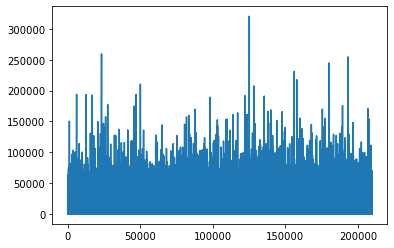

In [22]:
Data['daily_decr90'].plot.line()

In [23]:
# The highest amount paid in an average of 90 days is around 3,20,000

<AxesSubplot:xlabel='label'>

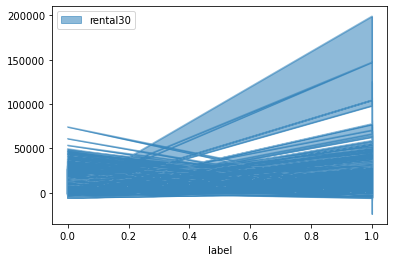

In [24]:
Data.plot.area(x='label',y='rental30',stacked=False)

In [25]:
# Even though there is huge outliers present in the data, however it can be said that majority failures have happened
# where the average main account balance for 30 days is less than 1,00,000 rupees

<AxesSubplot:xlabel='label'>

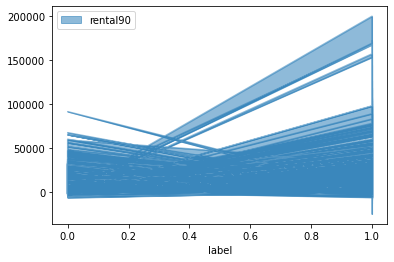

In [26]:
Data.plot.area(x='label',y='rental90',stacked=False)

In [27]:
# Even though there is huge outliers present in the data, however it can be said that majority failures have happened
# where the average main account balance for 30 days is less than 1,00,000 rupees
# There is a possibility of failure where the  average main account balance of 30 and 90 days are less than 1,00,000

<AxesSubplot:>

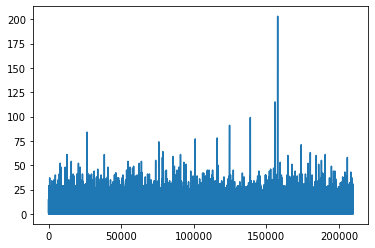

In [28]:
Data['cnt_ma_rech30'].plot.line()

In [29]:
# We have data which shows that an account has been recharged over 200 times in a month

<AxesSubplot:>

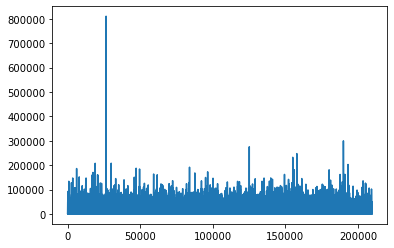

In [30]:
Data['sumamnt_ma_rech30'].plot.line()

In [31]:
# The highest amount recharged over 30 days shows over 8,00,000 lakh

<AxesSubplot:xlabel='label'>

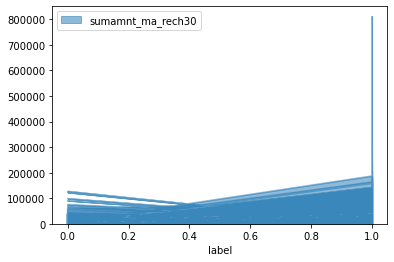

In [32]:
Data.plot.area(x='label',y='sumamnt_ma_rech30',stacked=False)

In [33]:
# Once again it shows that anything recharged over 1,00,000 rupees has less chance of a failure

<AxesSubplot:>

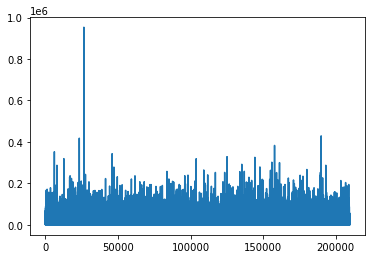

In [34]:
Data['sumamnt_ma_rech90'].plot.line()

In [35]:
# The highest amount recharged over 90 days shows around 9,00,000 lakh

In [36]:
# As we do not need the customer's telephone number, their telecom circle as well as the date hence dropping off these columns

In [37]:
Data.drop(['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [38]:
Data.shape

(209593, 33)

In [39]:
Data['label'].value_counts() #Checking the count of the target data

1    183431
0     26162
Name: label, dtype: int64

In [40]:
# Data is clearly imbalanced

In [41]:
from sklearn.utils import resample

In [42]:
failure=Data[Data.label==0]
success=Data[Data.label==1]

In [43]:
failure_upsamples=resample(failure,replace=True,n_samples=len(success),random_state=27)

In [44]:
upsampled=pd.concat([success,failure_upsamples])

In [45]:
Data=upsampled

In [46]:
Data['label'].value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [47]:
# Target data has now been balanced

In [48]:
Data.reset_index(drop=True, inplace=True)

In [49]:
X=Data.drop('label',axis=1)
Y=Data['label'] #Seperating the target and classes

In [50]:
X.skew().sort_values(ascending=False) #Checking the skewness

medianmarechprebal90    45.439607
cnt_da_rech90           27.093817
fr_da_rech90            25.812222
cnt_da_rech30           18.468319
maxamnt_loans30         17.954840
cnt_loans90             16.811494
last_rech_date_ma       15.335222
last_rech_date_da       15.060253
fr_ma_rech30            14.974802
fr_da_rech30            14.807260
medianmarechprebal30    14.112560
aon                     10.175736
payback30                8.213847
payback90                6.864790
sumamnt_ma_rech30        6.778993
sumamnt_ma_rech90        5.562973
medianamnt_loans90       5.288104
daily_decr90             5.282585
medianamnt_loans30       5.005464
last_rech_amt_ma         4.920042
medianamnt_ma_rech90     4.861770
daily_decr30             4.856573
rental90                 4.570556
rental30                 4.504373
medianamnt_ma_rech30     4.392988
cnt_ma_rech90            3.905038
amnt_loans90             3.891698
amnt_loans30             3.614976
cnt_ma_rech30            3.599915
cnt_loans30   

In [51]:
from sklearn.preprocessing import power_transform

In [52]:
New_X=power_transform(X)

In [53]:
pd.DataFrame(New_X,columns=X.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

fr_da_rech90             14.501665
fr_da_rech30             11.161036
medianmarechprebal90      8.109599
cnt_da_rech30             7.225718
cnt_da_rech90             6.501528
medianamnt_loans90        4.219526
medianamnt_loans30        3.941135
aon                       1.839084
payback30                 0.737815
payback90                 0.597547
fr_ma_rech30              0.449647
maxamnt_loans90           0.398013
fr_ma_rech90              0.342882
cnt_loans90               0.234400
cnt_ma_rech30             0.057868
cnt_ma_rech90             0.049950
cnt_loans30               0.006285
amnt_loans30             -0.094624
amnt_loans90             -0.105459
sumamnt_ma_rech90        -0.324762
last_rech_amt_ma         -0.355477
medianamnt_ma_rech90     -0.366644
sumamnt_ma_rech30        -0.374692
medianamnt_ma_rech30     -0.420450
medianmarechprebal30     -0.572272
rental90                 -0.955387
rental30                 -1.028118
maxamnt_loans30          -2.280926
last_rech_date_ma   

In [54]:
X=pd.DataFrame(New_X,columns=X.columns)

In [55]:
X.isnull().sum()

aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [56]:
Features= SelectKBest(score_func=f_regression, k=30)
fit=Features.fit(X,Y)
scores=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(X.columns)

In [57]:
Total_Score=pd.concat([columns,scores],axis=1)
Total_Score.columns=['Column','Score']
print(Total_Score.nlargest(30,'Score'))

                  Column          Score
13         cnt_ma_rech90  147884.585884
15     sumamnt_ma_rech90  130101.001211
8          cnt_ma_rech30  129722.510857
10     sumamnt_ma_rech30  118609.542232
26           cnt_loans90   79206.001627
27          amnt_loans90   77047.217154
31             payback90   69989.605154
30             payback30   66477.109482
9           fr_ma_rech30   63350.051024
11  medianamnt_ma_rech30   62551.767587
2           daily_decr90   59435.090618
22           cnt_loans30   58216.565274
23          amnt_loans30   58126.471552
1           daily_decr30   57837.363830
7       last_rech_amt_ma   53591.410834
14          fr_ma_rech90   49733.098654
16  medianamnt_ma_rech90   48812.026785
4               rental90    5758.215406
17  medianmarechprebal90    5628.594906
28       maxamnt_loans90    5164.489765
3               rental30    3293.097415
25    medianamnt_loans30    2276.668400
29    medianamnt_loans90    1372.769876
0                    aon     681.475008


In [58]:
# We found out the 30 best features which will most affect the target variable Y

In [59]:
X_New=X[['cnt_ma_rech90','sumamnt_ma_rech90','cnt_ma_rech30','sumamnt_ma_rech30','cnt_loans90','amnt_loans90','payback90','payback30','fr_ma_rech30','medianamnt_ma_rech30','daily_decr90','cnt_loans30','amnt_loans30','daily_decr30','last_rech_amt_ma','fr_ma_rech90','medianamnt_ma_rech90','rental90','medianmarechprebal90','maxamnt_loans90','rental30','medianamnt_loans30','medianamnt_loans90','aon','last_rech_date_ma','medianmarechprebal30','cnt_da_rech90','cnt_da_rech30','fr_da_rech90','last_rech_date_da']]
X_New

,cnt_ma_rech90,sumamnt_ma_rech90,cnt_ma_rech30,sumamnt_ma_rech30,cnt_loans90,amnt_loans90,payback90,payback30,fr_ma_rech30,medianamnt_ma_rech30,...,rental30,medianamnt_loans30,medianamnt_loans90,aon,last_rech_date_ma,medianmarechprebal30,cnt_da_rech90,cnt_da_rech30,fr_da_rech90,last_rech_date_da
0,-0.550314,0.378491,-0.326441,0.630638,-0.813462,0.140613,-0.771458,-0.711941,-0.875614,1.521403,...,0.425318,-0.239215,-0.224997,0.062236,0.210680,0.041495,-0.150334,-0.135841,-0.068633,-0.073913
1,-0.550314,-0.209102,-0.326441,0.023771,-0.813462,-0.775710,-0.771458,-0.711941,-0.875614,0.513558,...,-0.304634,-0.239215,-0.224997,-0.005037,-0.017138,0.044917,-0.150334,-0.135841,-0.068633,-0.073913
2,-0.550314,-0.385768,-1.353032,-1.500859,0.238959,0.140613,-0.771458,-0.711941,-0.875614,-1.535135,...,-0.550269,-0.239215,-0.224997,-0.160248,0.336725,-0.030206,-0.150334,-0.135841,-0.068633,-0.073913
3,1.053420,1.212853,1.305485,1.368618,1.545404,1.479189,0.926366,1.146577,0.603319,0.785439,...,-0.246075,-0.239215,-0.224997,0.136548,0.008439,0.016487,-0.150334,-0.135841,-0.068633,-0.073913
4,1.053420,0.768454,0.807877,0.663146,0.763121,0.620621,1.464416,1.637111,1.443634,0.513558,...,-0.473991,-0.239215,-0.224997,0.008490,-0.048129,0.001604,-0.150334,-0.135841,-0.068633,-0.073913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,0.242296,0.266050,0.552669,0.515263,-0.813462,-0.775710,-0.771458,-0.711941,1.353573,0.513558,...,-0.461185,-0.239215,-0.224997,-0.251352,0.185422,-0.006040,-0.150334,-0.135841,-0.068633,-0.073913
366858,-0.550314,-0.385768,-1.353032,-1.500859,-0.813462,-0.775710,-0.771458,-0.711941,-0.875614,-1.535135,...,0.030414,-0.239215,-0.224997,0.349860,0.367764,-0.030206,-0.150334,-0.135841,-0.068633,-0.073913
366859,-0.074821,0.077449,0.204275,0.320978,-0.813462,-0.775710,-0.771458,-0.711941,1.443634,0.513558,...,0.543159,-0.239215,-0.224997,-0.013928,0.097348,0.006588,-0.150334,-0.135841,-0.068633,-0.073913
366860,-0.074821,0.740052,0.204275,0.999550,0.238959,0.140613,-0.771458,-0.711941,1.479345,1.491314,...,-1.172103,-0.239215,-0.224997,0.182877,0.202583,0.187081,-0.150334,-0.135841,-0.068633,-0.073913


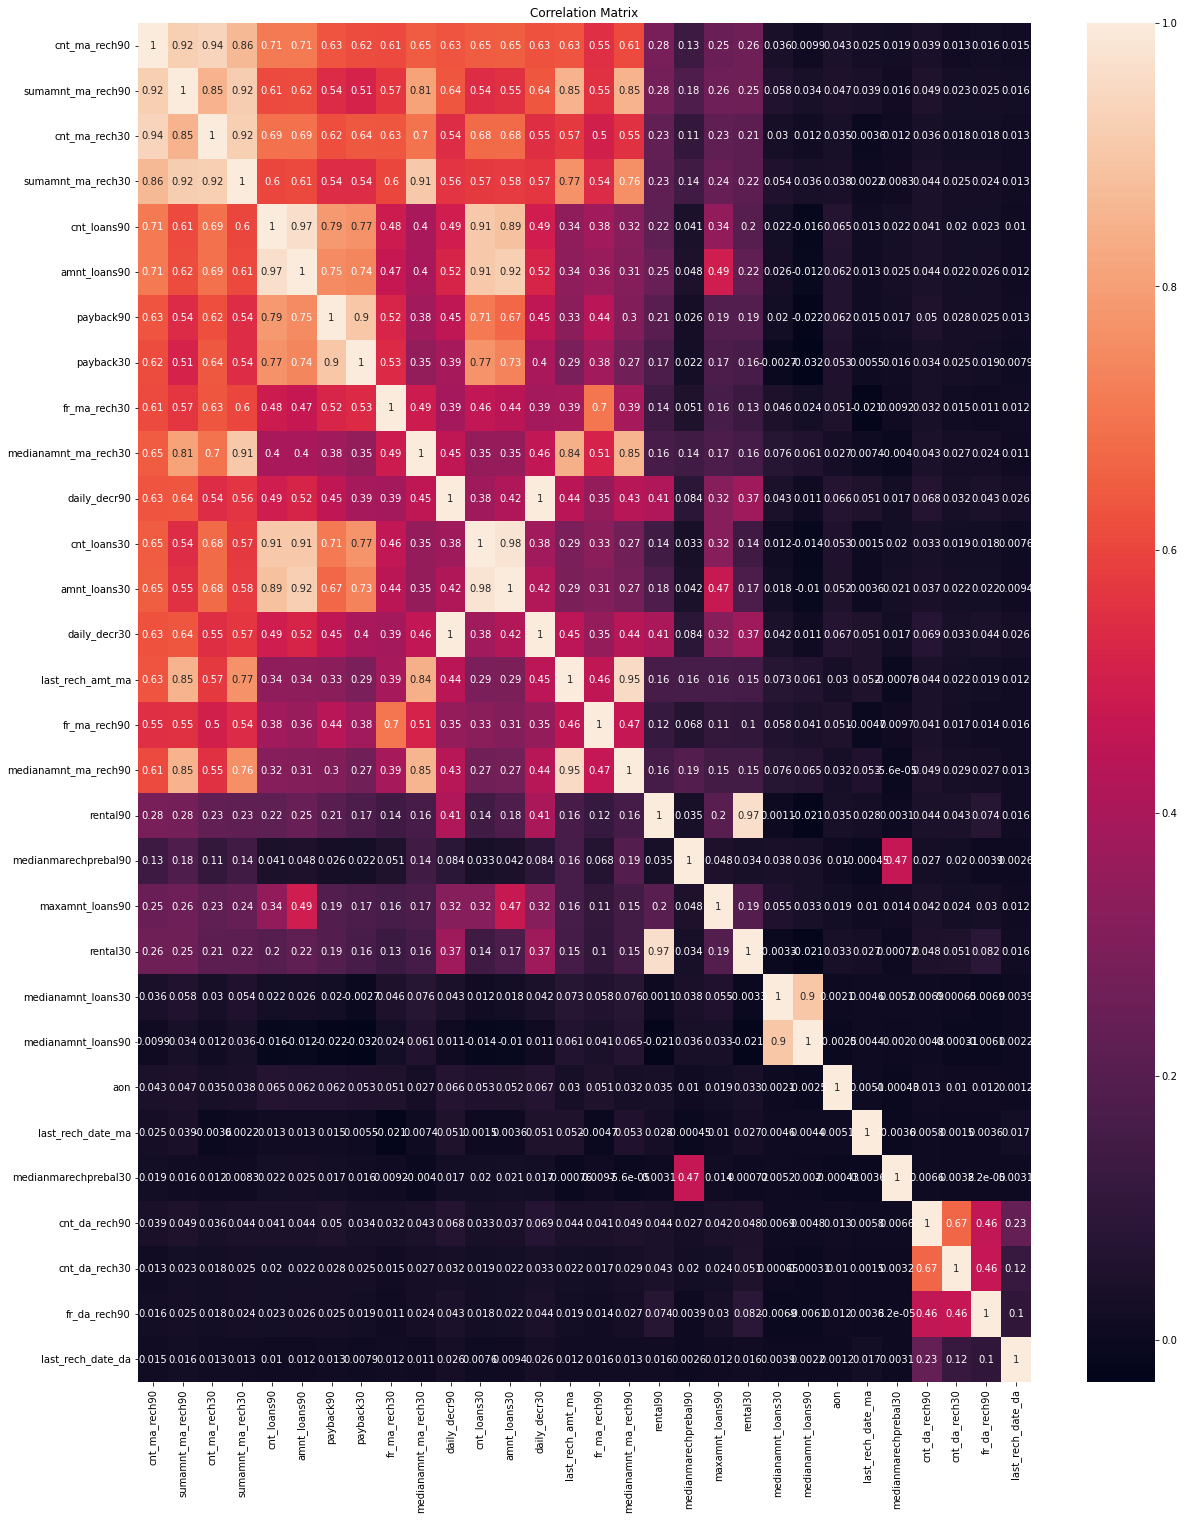

In [60]:
corr_mat=X_New.corr()
plt.figure(figsize=[20,25])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [61]:
# From the heatmap it can be seen that there is a huge issue of multicollinearity. Lets check via VIF

In [62]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_New.columns
vif_data["VIF"] = [variance_inflation_factor(X_New.values, i)
                          for i in range(len(X_New.columns))]

vif_data

,feature,VIF
0,cnt_ma_rech90,95.756029
1,sumamnt_ma_rech90,178.591863
2,cnt_ma_rech30,102.184974
3,sumamnt_ma_rech30,241.438482
4,cnt_loans90,27.196408
5,amnt_loans90,36.677369
6,payback90,7.377498
7,payback30,7.561827
8,fr_ma_rech30,2.731155
9,medianamnt_ma_rech30,58.836042


In [63]:
# Here there is following observation:
# 1. Total amount of recharge in the main account for 30 days is included in total amount of recharge for 90 days. Both these 
# features have high corellation hence dropping one .

# 2. Daily recharge from main account for 30 days is included in Daily recharge from main account for 90 days. Both these 
# features have high corellation hence dropping one .

# 3. Number of times main account recharge for 30 days is included in Number of times main account recharge for 90 days. Both these 
# features have high corellation hence dropping one .


In [64]:
X_New.drop(['cnt_ma_rech30','daily_decr30','sumamnt_ma_rech30'],axis=1,inplace=True)

In [65]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_New.columns
vif_data["VIF"] = [variance_inflation_factor(X_New.values, i)
                          for i in range(len(X_New.columns))]

vif_data

,feature,VIF
0,cnt_ma_rech90,23.412902
1,sumamnt_ma_rech90,55.003763
2,cnt_loans90,27.189183
3,amnt_loans90,36.081891
4,payback90,7.327141
5,payback30,7.422534
6,fr_ma_rech30,2.570731
7,medianamnt_ma_rech30,4.377408
8,daily_decr90,2.175348
9,cnt_loans30,78.688372


In [66]:
# We still have high collinearity, therefore similar to the above column we also have cnt_loans30 and amnt_loans30
# These are already included in cnt_loans90 and amnt_loans30

In [67]:
X_New.drop(['cnt_loans30','amnt_loans30'],axis=1,inplace=True)

In [68]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_New.columns
vif_data["VIF"] = [variance_inflation_factor(X_New.values, i)
                          for i in range(len(X_New.columns))]

vif_data

,feature,VIF
0,cnt_ma_rech90,23.390770
1,sumamnt_ma_rech90,54.154101
2,cnt_loans90,24.048747
3,amnt_loans90,28.428751
4,payback90,6.557669
5,payback30,6.163103
6,fr_ma_rech30,2.562045
7,medianamnt_ma_rech30,4.368223
8,daily_decr90,2.102082
9,last_rech_amt_ma,12.253729


In [69]:
# There is still an issue of high collinearity however due to the issue of data loss we are proceeding with the above features

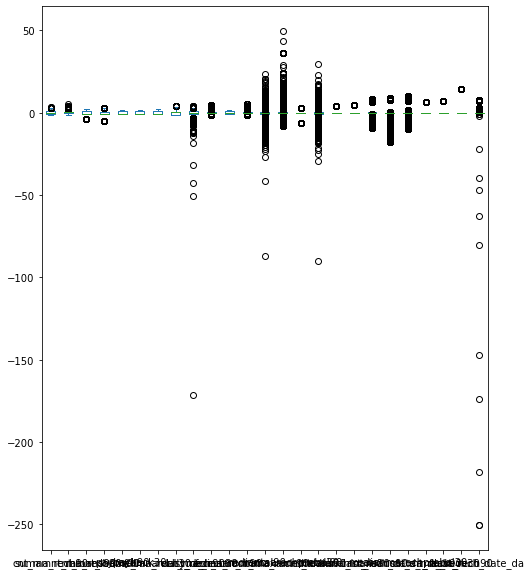

In [70]:
X_New.plot(kind='box',figsize=(8,10),layout=(4,3))
plt.show() #checking for oultiers

In [71]:
# Data shows innumerable outliers

In [72]:
from scipy.stats import zscore

In [73]:
(np.abs(zscore(X_New)<3)).all()

cnt_ma_rech90           False
sumamnt_ma_rech90       False
cnt_loans90              True
amnt_loans90            False
payback90                True
payback30                True
fr_ma_rech30             True
medianamnt_ma_rech30    False
daily_decr90            False
last_rech_amt_ma        False
fr_ma_rech90             True
medianamnt_ma_rech90    False
rental90                False
medianmarechprebal90    False
maxamnt_loans90          True
rental30                False
medianamnt_loans30      False
medianamnt_loans90      False
aon                     False
last_rech_date_ma       False
medianmarechprebal30    False
cnt_da_rech90           False
cnt_da_rech30           False
fr_da_rech90            False
last_rech_date_da       False
dtype: bool

In [74]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X_New))>3)
index

(array([     6,     23,     23, ..., 366855, 366855, 366856], dtype=int64),
 array([21, 16, 17, ..., 21, 22, 13], dtype=int64))

In [75]:
# assigning a variable to the values having less than 3 zscore
X_new = X_New[(np.abs(zscore(X_New))<3).all(axis=1)]
X_new

,cnt_ma_rech90,sumamnt_ma_rech90,cnt_loans90,amnt_loans90,payback90,payback30,fr_ma_rech30,medianamnt_ma_rech30,daily_decr90,last_rech_amt_ma,...,rental30,medianamnt_loans30,medianamnt_loans90,aon,last_rech_date_ma,medianmarechprebal30,cnt_da_rech90,cnt_da_rech30,fr_da_rech90,last_rech_date_da
0,-0.550314,0.378491,-0.813462,0.140613,-0.771458,-0.711941,-0.875614,1.521403,1.332594,1.482310,...,0.425318,-0.239215,-0.224997,0.062236,0.210680,0.041495,-0.150334,-0.135841,-0.068633,-0.073913
1,-0.550314,-0.209102,-0.813462,-0.775710,-0.771458,-0.711941,-0.875614,0.513558,0.300030,0.374120,...,-0.304634,-0.239215,-0.224997,-0.005037,-0.017138,0.044917,-0.150334,-0.135841,-0.068633,-0.073913
2,-0.550314,-0.385768,0.238959,0.140613,-0.771458,-0.711941,-0.875614,-1.535135,-0.765896,0.065137,...,-0.550269,-0.239215,-0.224997,-0.160248,0.336725,-0.030206,-0.150334,-0.135841,-0.068633,-0.073913
3,1.053420,1.212853,1.545404,1.479189,0.926366,1.146577,0.603319,0.785439,-0.380732,0.668643,...,-0.246075,-0.239215,-0.224997,0.136548,0.008439,0.016487,-0.150334,-0.135841,-0.068633,-0.073913
4,1.053420,0.768454,0.763121,0.620621,1.464416,1.637111,1.443634,0.513558,0.492319,0.374120,...,-0.473991,-0.239215,-0.224997,0.008490,-0.048129,0.001604,-0.150334,-0.135841,-0.068633,-0.073913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,0.242296,0.266050,-0.813462,-0.775710,-0.771458,-0.711941,1.353573,0.513558,0.432736,0.374120,...,-0.461185,-0.239215,-0.224997,-0.251352,0.185422,-0.006040,-0.150334,-0.135841,-0.068633,-0.073913
366858,-0.550314,-0.385768,-0.813462,-0.775710,-0.771458,-0.711941,-0.875614,-1.535135,-0.919882,0.065137,...,0.030414,-0.239215,-0.224997,0.349860,0.367764,-0.030206,-0.150334,-0.135841,-0.068633,-0.073913
366859,-0.074821,0.077449,-0.813462,-0.775710,-0.771458,-0.711941,1.443634,0.513558,0.010988,0.374120,...,0.543159,-0.239215,-0.224997,-0.013928,0.097348,0.006588,-0.150334,-0.135841,-0.068633,-0.073913
366860,-0.074821,0.740052,0.238959,0.140613,-0.771458,-0.711941,1.479345,1.491314,-0.514403,1.826093,...,-1.172103,-0.239215,-0.224997,0.182877,0.202583,0.187081,-0.150334,-0.135841,-0.068633,-0.073913


In [76]:
X_new.shape # New shape

(310691, 25)

In [77]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0         1
1         1
2         1
3         1
4         1
         ..
366857    0
366858    0
366859    0
366860    0
366861    0
Name: label, Length: 310691, dtype: int64

In [78]:
Y_new.shape #New shape

(310691,)

In [79]:
Scalar=StandardScaler() #scaling the data

In [80]:
X_Scaled=Scalar.fit_transform(X_new)
X_Scaled

array([[-0.51182453,  0.4240501 , -0.85741498, ...,  1.        ,
        -1.        , -0.02843201],
       [-0.51182453, -0.15917618, -0.85741498, ...,  1.        ,
        -1.        , -0.02843201],
       [-0.51182453, -0.33452936,  0.2382696 , ...,  1.        ,
        -1.        , -0.02843201],
       ...,
       [-0.0425187 ,  0.12524568, -0.85741498, ...,  1.        ,
        -1.        , -0.02843201],
       [-0.0425187 ,  0.78292484,  0.2382696 , ...,  1.        ,
        -1.        , -0.02843201],
       [-0.51182453, -0.15917618, -0.85741498, ...,  1.        ,
        -1.        , -0.02843201]])

# Logistic Regression

In [81]:
LR=LogisticRegression()

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test) # Testing the prediction of test data

In [83]:
LR_accuracy=accuracy_score(y_test,pred_test)*100
LR_accuracy

77.6211397029241

In [84]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[25523,  6697],
       [ 7209, 22710]], dtype=int64)

# Decision Tree Classifier

In [85]:
DT=DecisionTreeClassifier()

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test) # Testing the prediction of test data

In [87]:
DT_accuracy=accuracy_score(y_test,pred_test)*100
DT_accuracy

95.56800077246173

In [88]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[32187,    33],
       [ 2721, 27198]], dtype=int64)

# Random Forest Classifier

In [89]:
RF=RandomForestClassifier()

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test) # Testing the prediction of test data

In [91]:
RF_accuracy=accuracy_score(y_test,pred_test)*100
RF_accuracy

97.85320008368336

In [92]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[32185,    35],
       [ 1299, 28620]], dtype=int64)

# Gradient Boosting

In [93]:
GB=GradientBoostingClassifier()

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test) # Testing the prediction of test data

In [95]:
GB_accuracy=accuracy_score(y_test,pred_test)*100
GB_accuracy

80.65144273322711

In [96]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[26631,  5589],
       [ 6434, 23485]], dtype=int64)

# Cross Validation for LR

In [97]:
LR_Val=cross_val_score(LR,X_Scaled,Y_new,cv=5)
print("The cross validation score is",RF_Val.mean())

The cross validation score for 2 is 0.7755165084891841
The cross validation score for 3 is 0.7753748913094468
The cross validation score for 4 is 0.7754489214078257
The cross validation score for 5 is 0.7754778869284764


# Cross Validation for DT

In [98]:
DT_Val=cross_val_score(DT,X_Scaled,Y_new,cv=5)
print("The cross validation score is",DT_Val.mean())

The cross validation score for 2 is 0.9329494568676597
The cross validation score for 3 is 0.9478452832003352
The cross validation score for 4 is 0.9526925483320713
The cross validation score for 5 is 0.9549938646918494


# Cross Validation for RF

In [99]:
RF_Val=cross_val_score(RF,X_Scaled,Y_new,cv=3)
print("The cross validation score is",RF_Val.mean())

The cross validation score is 0.9779716817597965


# Cross Validation for GB

In [100]:
GB_Val=cross_val_score(GB,X_Scaled,Y_new,cv=3)
print("The cross validation score is",GB_Val.mean())

The cross validation score is 0.8072393467557414


In [101]:
# Therefore we can find that there is no issue of overfitted model

# Based on the accuracy and cross validation score: Random Forest Classifier is the best model for this data set.

# Saving the model

In [104]:
import pickle
filename='Micro Credit Defaulter.pkl'
pickle.dump(RF,open(filename,'wb')) ##saving the model